<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/CNNpFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow import keras


In [11]:
keras.datasets.fashion_mnist.load_data()
(train_x,train_y),(test_x,test_y) = keras.datasets.fashion_mnist.load_data()

In [58]:
print('trainx', train_x.shape)
print('testx', test_x.shape)

trainx (60000, 28, 28)
testx (10000, 28, 28)


Text(0.5, 1.0, 'Số: 8')

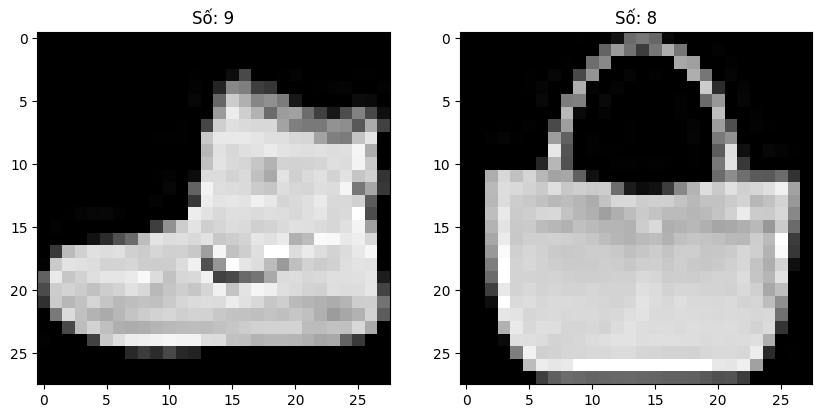

In [59]:
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(train_x[0], cmap = 'gray')
plt.title('Số: {}'.format(train_y[0]))
plt.subplot(122)
plt.imshow(train_x[100], cmap = 'gray')
plt.title('Số: {}'.format(train_y[100]))

In [60]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)
train_x.reshape,test_x.reshape
train_x = train_x.astype('float32')
train_x = train_x/255

In [61]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPool2D, Normalization
from keras.optimizers import Adam

batch_size = 64 #Lô để hạn, fitBox là lô để phân loại
epochs_size = 20
classes = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape = (28,28,10), padding = 'same'))  #Padding kichs thước bộ đệm sẽ bằng kích thước ban đầu
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f96de3424c0>>

In [63]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.activation.leaky_relu import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [88]:
model.add(Conv2D(128,(3,3), activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

from keras import optimizers
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
model.add(Flatten())    #Tự động lấy ảnh tạo thành 1 Vector
model.add(Dense(128, activation='linear')) #Chayj 128 tế bạo điểm ảnh sau đó xuất ra 10 loại
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        2912      
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                      

In [93]:
train = model.fit(train_x, train_y, batch_size = batch_size, epochs = 20, verbose = 1) 

Epoch 1/20


ValueError: ignored

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                      

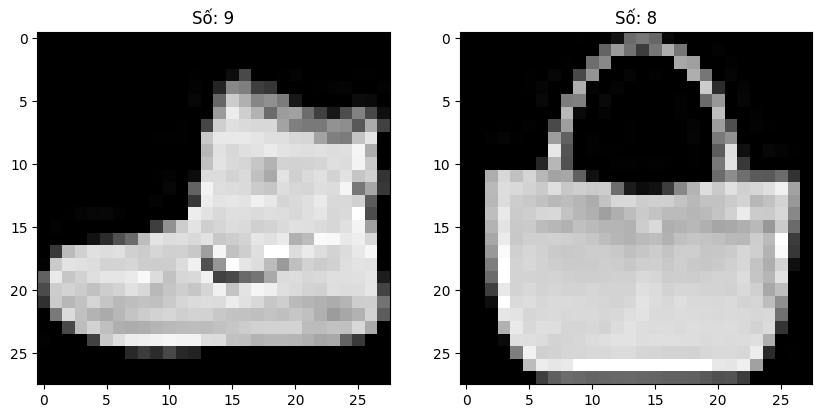

In [16]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
keras.datasets.fashion_mnist.load_data()
(train_x,train_y),(test_x,test_y) = keras.datasets.fashion_mnist.load_data()
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(train_x[0], cmap = 'gray')
plt.title('Số: {}'.format(train_y[0]))
plt.subplot(122)
plt.imshow(train_x[100], cmap = 'gray')
plt.title('Số: {}'.format(train_y[100]))
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)
train_x.reshape,test_x.reshape
train_x = train_x.astype('float32')
train_x = train_x/255

from keras.utils import to_categorical
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPool2D, Normalization
from keras.optimizers import Adam

batch_size = 64 #Lô để hạn, fitBox là lô để phân loại
epochs_size = 20
classes = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape = (28,28,1), padding = 'same'))  #Padding kichs thước bộ đệm sẽ bằng kích thước ban đầu
model.summary


from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.activation.leaky_relu import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
model.add(Flatten())    #Tự động lấy ảnh tạo thành 1 Vector
model.add(Dense(128, activation='linear')) #Chayj 128 tế bạo điểm ảnh sau đó xuất ra 10 loại
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
model.summary()
train = model.fit(train_x, train_y, batch_size = batch_size, epochs = 20, verbose = 1)  
# Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Text(0.5, 1.0, 'Trainning & Testing Accuracy')

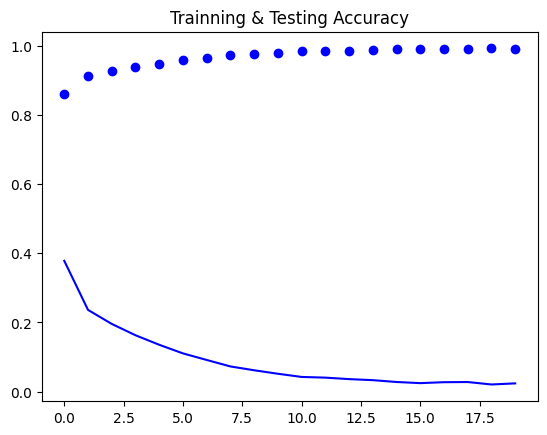

In [17]:
accuracy = train.history['accuracy'] 
val_accuracy = train.history['loss']
epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'bo', label = 'Trainning Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Test Accuracy')
plt.title('Trainning & Testing Accuracy')

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LeakyReLU

from keras.optimizers import Adam
#tạo mo hinh
batch_size = 64
epochs = 20
classes = 10 #phan ra 10 lớp

model = Sequential()

#bộ 1 32 lần chập
model.add(Conv2D(32,kernel_size=(3,3),activation = 'linear',input_shape = (28,28,1),padding = 'same')) #Thêm một lớp tích chập 2D với 32 bộ lọc
model.add(LeakyReLU(alpha=0.1))                                                                       #Thêm một lớp LeakyReLU với hệ số alpha là 0.1
model.add(MaxPooling2D((2,2),padding = 'same'))         #Thêm một lớp MaxPooling2D với kích thước là 2x2 và padding ở cạnh để giữ nguyên kích thước đầu vào

#bộ 2 64 lần chập
model.add(Conv2D(64, (3,3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#bộ 3 128 lần chập
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#tín hiệu vào là tấm phẳng
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(classes, activation='softmax'))

model.summary()
#images = X; labels = Y
# Biên dịch mô hình với Adam optimizer và hàm loss là categorical crossentropy
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Chuẩn bị dữ liệu cho huấn luyện và kiểm tra
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Chuyển đổi dữ liệu ảnh thành tensor 4D và chuẩn hóa các giá trị pixel về khoảng từ 0 đến 1
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32')
test_images /= 255

# One-hot encode các nhãn cho tập huấn luyện và kiểm tra
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
train = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1) #xuất hiện chỉ 1 làn rồi biến mất

# Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
938/938 [==============================] - 13s 4ms/step - loss: 0.4610 - accuracy: 0.8312
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2825 - accuracy: 0.8984
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2369 - accuracy: 0.9141
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2111 - accuracy: 0.9216
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1836 - accuracy: 0.9317
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1674 - accuracy: 0.9375
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1492 - accuracy: 0.9437
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1337 - accuracy: 0.9488
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1190 - accuracy: 0.9550
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1060 - accuracy: 0.960

KeyboardInterrupt: ignored

In [ ]:
accuracy = train.history['accuracy'] 
val_accuracy = train.history['loss']
epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'bo', label = 'Trainning Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Test Accuracy')
plt.title('Trainning & Testing Accuracy')